 **This file includes the experiments carried out for the task 3 section of the ML assignment**

In [ ]:
!pip install 'aif360[LFR]'

     |████████████████████████████████| 175 kB 7.1 MB/s 
     |████████████████████████████████| 564 kB 23.2 MB/s 
  Created wheel for memory-profiler: filename=memory_profiler-0.60.0-py3-none-any.whl size=31284 sha256=8f3d62a0e11155bf478c6dc1902eda8cb52b3bcd0d82277302ad613c2e1111c5
  Stored in directory: /root/.cache/pip/wheels/67/2b/fb/326e30d638c538e69a5eb0aa47f4223d979f502bbdb403950f
Successfully built memory-profiler


In [ ]:
cd /usr/local/lib/python3.7/dist-packages/aif360/data/raw/adult

/usr/local/lib/python3.7/dist-packages/aif360/data/raw/adult


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test

--2022-05-12 12:56:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data’

adult.data          100%[===================>]   3.79M  16.5MB/s    in 0.2s    

2022-05-12 12:56:35 (16.5 MB/s) - ‘adult.data’ saved [3974305/3974305]

--2022-05-12 12:56:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5229 (5.1K) [application/x-httpd-php]
Saving to: ‘adult.names’

adult.names         100%[===================>]   5.11K  --.-KB/s    in 0s      

2022-

In [ ]:
# Import the AIF360 library and set the random seed.
import numpy as np
import pandas as pd
from aif360.datasets import AdultDataset
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_adult
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_german
from aif360.metrics import ClassificationMetric, BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing.reweighing import Reweighing
import pdb
from sklearn import metrics
from sklearn.preprocessing import StandardScaler  #MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import linear_model, tree, ensemble
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import io, os, sys, requests


np.random.seed(0)

In [ ]:
from aif360.algorithms.inprocessing.adversarial_debiasing import AdversarialDebiasing
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.__version__

'2.8.0'

In [ ]:
# Define where the bias is in the features in dataset
privileged_groups = [{'race': 1}]
unprivileged_groups = [{'race': 0}]
dataset_orig = load_preproc_data_adult(['race'])

default_mapping = {'protected_attribute_maps':[{1.0: 'Male', 0.0:'Female'},
                                              {1.0:'White', 0.0:'Non-White'}]}
metrics = ['Equal opportunity difference']
# Split into train and test
train, test = dataset_orig.split([0.7], shuffle=True)
print("Training data size", train.features.shape)
print("Favourable and ufavourable labels:", train.favorable_label, train.unfavorable_label)
print("Protected attribute name:", train.protected_attribute_names)
print("Privileged and unprivileged protected attribute values:", train.privileged_protected_attributes, train.unprivileged_protected_attributes)
print("Dataset feature names", train.feature_names)

Training data size (34189, 18)
Favourable and ufavourable labels: 1.0 0.0
Protected attribute name: ['race']
Privileged and unprivileged protected attribute values: [array([1.])] [array([0.])]
Dataset feature names ['race', 'sex', 'Age (decade)=10', 'Age (decade)=20', 'Age (decade)=30', 'Age (decade)=40', 'Age (decade)=50', 'Age (decade)=60', 'Age (decade)=>=70', 'Education Years=6', 'Education Years=7', 'Education Years=8', 'Education Years=9', 'Education Years=10', 'Education Years=11', 'Education Years=12', 'Education Years=<6', 'Education Years=>12']


In [ ]:
# Train classifier on original data
scale_orig = StandardScaler()
X_train = scale_orig.fit_transform(train.features)
y_train = train.labels.ravel()

X_test = scale_orig.transform(test.features) 
y_test = test.labels.ravel()

# **Adversarial Debiasing**

**Build plan classifier withouth debiasing**

In [ ]:
sess = tf.compat.v1.Session()
plain_model = AdversarialDebiasing(privileged_groups = privileged_groups,
                          unprivileged_groups = unprivileged_groups,
                          scope_name='plain_classifier',
                          debias=False,
                          sess=sess)

In [ ]:
plain_model.fit(train)

epoch 0; iter: 0; batch classifier loss: 0.672967
epoch 0; iter: 200; batch classifier loss: 0.402007
epoch 1; iter: 0; batch classifier loss: 0.460182
epoch 1; iter: 200; batch classifier loss: 0.434673
epoch 2; iter: 0; batch classifier loss: 0.439703
epoch 2; iter: 200; batch classifier loss: 0.465170
epoch 3; iter: 0; batch classifier loss: 0.427302
epoch 3; iter: 200; batch classifier loss: 0.397274
epoch 4; iter: 0; batch classifier loss: 0.446835
epoch 4; iter: 200; batch classifier loss: 0.482675
epoch 5; iter: 0; batch classifier loss: 0.508352
epoch 5; iter: 200; batch classifier loss: 0.385574
epoch 6; iter: 0; batch classifier loss: 0.380414
epoch 6; iter: 200; batch classifier loss: 0.403661
epoch 7; iter: 0; batch classifier loss: 0.461324
epoch 7; iter: 200; batch classifier loss: 0.404989
epoch 8; iter: 0; batch classifier loss: 0.360345
epoch 8; iter: 200; batch classifier loss: 0.370048
epoch 9; iter: 0; batch classifier loss: 0.400265
epoch 9; iter: 200; batch classi

**Apply the plain model to test data**

In [ ]:
datasettrain_nodebiasing = plain_model.predict(train)
datasettest_nodebiasing = plain_model.predict(test)

**Metrics for the dataset from plain model (without debiasing)**

In [ ]:
dataset_nodebiasing_train = BinaryLabelDatasetMetric(dataset_nodebiasing_train, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
dataset_nodebiasing_test = BinaryLabelDatasetMetric(datasettest_nodebiasing, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

In [1]:
model_test = ClassificationMetric(test,
                                  dataset_nodebiasing_test,
                                  unprivileged_groups=unprivileged_groups,
                                  privileged_groups=privileged_groups)
print("Classification accuracy (test set) = %.4f" % model_test.accuracy())

In [ ]:
TPR = model_test.true_positive_rate()
TNR = model_test.true_negative_rate()
bal_acc_nodebiasing_test = 0.5*(TPR+TNR)
print("Balanced classification accuracy (test set) = %.4f" % bal_acc_nodebiasing_test)
print("Equal opportunity difference (test set) = %.4f" % model_test.equal_opportunity_difference())

**Apply in-processing algorithm based on adversarial learning**

In [ ]:
sess.close()
tf.compat.v1.reset_default_graph()
sess = tf.compat.v1.Session()

In [ ]:
# Model learn parameteres when debias set to true
debiased_model = AdversarialDebiasing(privileged_groups = privileged_groups,
                          unprivileged_groups = unprivileged_groups,
                          scope_name='debiased_classifier',
                          debias=True,
                          sess=sess)

In [ ]:
debiased_model.fit(train)

epoch 0; iter: 0; batch classifier loss: 0.655340; batch adversarial loss: 0.616412
epoch 0; iter: 200; batch classifier loss: 0.485609; batch adversarial loss: 0.628936
epoch 1; iter: 0; batch classifier loss: 0.455992; batch adversarial loss: 0.605380
epoch 1; iter: 200; batch classifier loss: 0.478797; batch adversarial loss: 0.557622
epoch 2; iter: 0; batch classifier loss: 0.488786; batch adversarial loss: 0.623147
epoch 2; iter: 200; batch classifier loss: 0.587420; batch adversarial loss: 0.502547
epoch 3; iter: 0; batch classifier loss: 0.468105; batch adversarial loss: 0.481824
epoch 3; iter: 200; batch classifier loss: 0.479166; batch adversarial loss: 0.446349
epoch 4; iter: 0; batch classifier loss: 0.435897; batch adversarial loss: 0.485141
epoch 4; iter: 200; batch classifier loss: 0.511022; batch adversarial loss: 0.422895
epoch 5; iter: 0; batch classifier loss: 0.424229; batch adversarial loss: 0.470006
epoch 5; iter: 200; batch classifier loss: 0.511946; batch adversa

**Apply the plain model to test data**

In [ ]:
debiasing_train = debiased_model.predict(train)
debiasing_test = debiased_model.predict(test)

In [ ]:
dataset_debiasing_train = BinaryLabelDatasetMetric(debiasing_train, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

dataset_debiasing_test = BinaryLabelDatasetMetric(debiasing_test, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

**Metrics for the dataset from plain model (with debiasing)**

In [ ]:
modeldebiasing_test = ClassificationMetric(test,
                                           dataset_debiasing_test,
                                           unprivileged_groups=unprivileged_groups,
                                           privileged_groups=privileged_groups)
print("Classification accuracy (test set) = %.4f" % modeldebiasing_test.accuracy())

In [ ]:
TPR = modeldebiasing_test.true_positive_rate()
TNR = modeldebiasing_test.true_negative_rate()
bal_acc_debiasing_test = 0.5*(TPR+TNR)
print("Balanced classification accuracy (test set) = %.4f" % bal_acc_debiasing_test)
print("Equal opportunity difference (test set) = %.4f" % modeldebiasing_test.equal_opportunity_difference())

# **Weighted Oversampling**

In [ ]:
DATASET = (
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names",
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",
)

def download_data(path='dataset', urls=DATASET):
    if not os.path.exists(path):
        os.mkdir(path)

    for url in urls:
        response = requests.get(url)
        name = os.path.basename(url)
        with open(os.path.join(path, name), 'wb') as f:
          f.write(response.content)
download_data()

In [ ]:
headers = ['age', 'workclass', 'fnlwgt', 
           'education', 'education-num', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 
           'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 
           'predclass']
training_raw = pd.read_csv('dataset/adult.data', 
                       header=None, 
                       names=headers, 
                       sep=',\s', 
                       na_values=["?"], 
                       engine='python')
test_raw = pd.read_csv('dataset/adult.test', 
                      header=None, 
                      names=headers, 
                      sep=',\s', 
                      na_values=["?"], 
                      engine='python', 
                      skiprows=1)

In [ ]:
dataset_raw = training_raw.append(test_raw)
dataset_raw.reset_index(inplace=True)
dataset_raw.drop('index',inplace=True,axis=1)

In [ ]:
transformed = train.convert_to_dataframe()[0]


In [ ]:
x_trans = transformed.drop(['sex'], axis = 1)

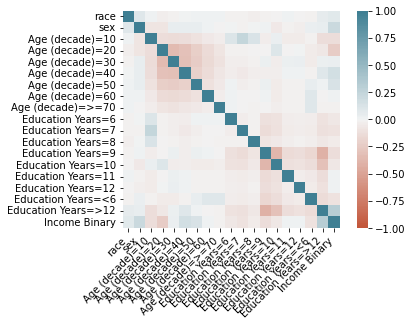

In [ ]:
import seaborn as sns
corr = transformed.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
df = training_raw
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

In [ ]:
df['predclass'] = df['predclass'].map({'>50K':1, '<=50K':0})

In [ ]:
df['race'] = df['race'].map({'White':1, 'Asian-Pac-Islander':0, 'Black':0, 'Amer-Indian-Eskimo':0, 'Other':0 })

In [ ]:
df1 = df[['sex', 'predclass']]
df_male = df.loc[(df["predclass"] ==1) & (df["sex"] == 0)]

In [ ]:
df_female = df.loc[(df["predclass"] ==1) & (df["sex"] == 1)]

In [ ]:
df_male = df_male.sample(len(df_female), replace=True)

In [ ]:
bigdata = df.append(df_male, ignore_index=True)
bigdata

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,1,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,1,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,1,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33735,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,1,0,0,0,55,United-States,1
33736,34,Private,160216,Bachelors,13,Never-married,Exec-managerial,Not-in-family,1,0,0,0,55,United-States,1
33737,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,0,0,15020,0,45,United-States,1
33738,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,1,0,0,0,20,United-States,1


In [ ]:
X=bigdata[['sex', 'race']].values
y=bigdata['predclass'].values
kf = KFold(n_splits=5,shuffle=True)
y_hat_all = []
for train_index, test_index in kf.split(X,y):
    reg = LogisticRegression()
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = reg.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    score = accuracy_score(y_test, y_hat)
    print(score)
    y_hat_all.append(y_hat)

0.7270302311796087
0.7329579134558387
0.7489626556016598
0.728660343805572
0.725696502667457
